In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import beam.calc.electron as ecalc
import scipy.constants as const
from beam.beams import electronbeam
from beam import interactions
plt.style.use('presentation')
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
e = const.physical_constants['elementary charge'][0]
path = '/media/robert/Data_Storage/Data/Transverse_Offset/Animations'

In [2]:
# Calculate beam evolution with no offset through a uniform plasma
Nz = 600
z = np.linspace(0, 10*2*np.pi, Nz, dtype='double')
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2 # Go from Robert units to normalized units
ne = ne0*np.ones(Nz)
kb = 5.95074e4 * np.sqrt(ne0)/np.sqrt(2*gb0)
betaBeam = 1
alphaBeam = 0
eps = 1.0e-6
delta = 0.1
sigma_r0 = np.sqrt(betaBeam*eps)
electronParams = {
    'name' : 'Pure_Offset',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : gb0*eps,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : delta,
    'offset_x' : 4*sigma_r0,
    'offset_y' : 0,
    'offset_xp' : 0,
    'offset_yp' : 0
}

beam = electronbeam.OffsetGaussianElectronBeam(electronParams)
#beam.plot_current_phase()

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return ne
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z*1e6, dumpPer, 4)

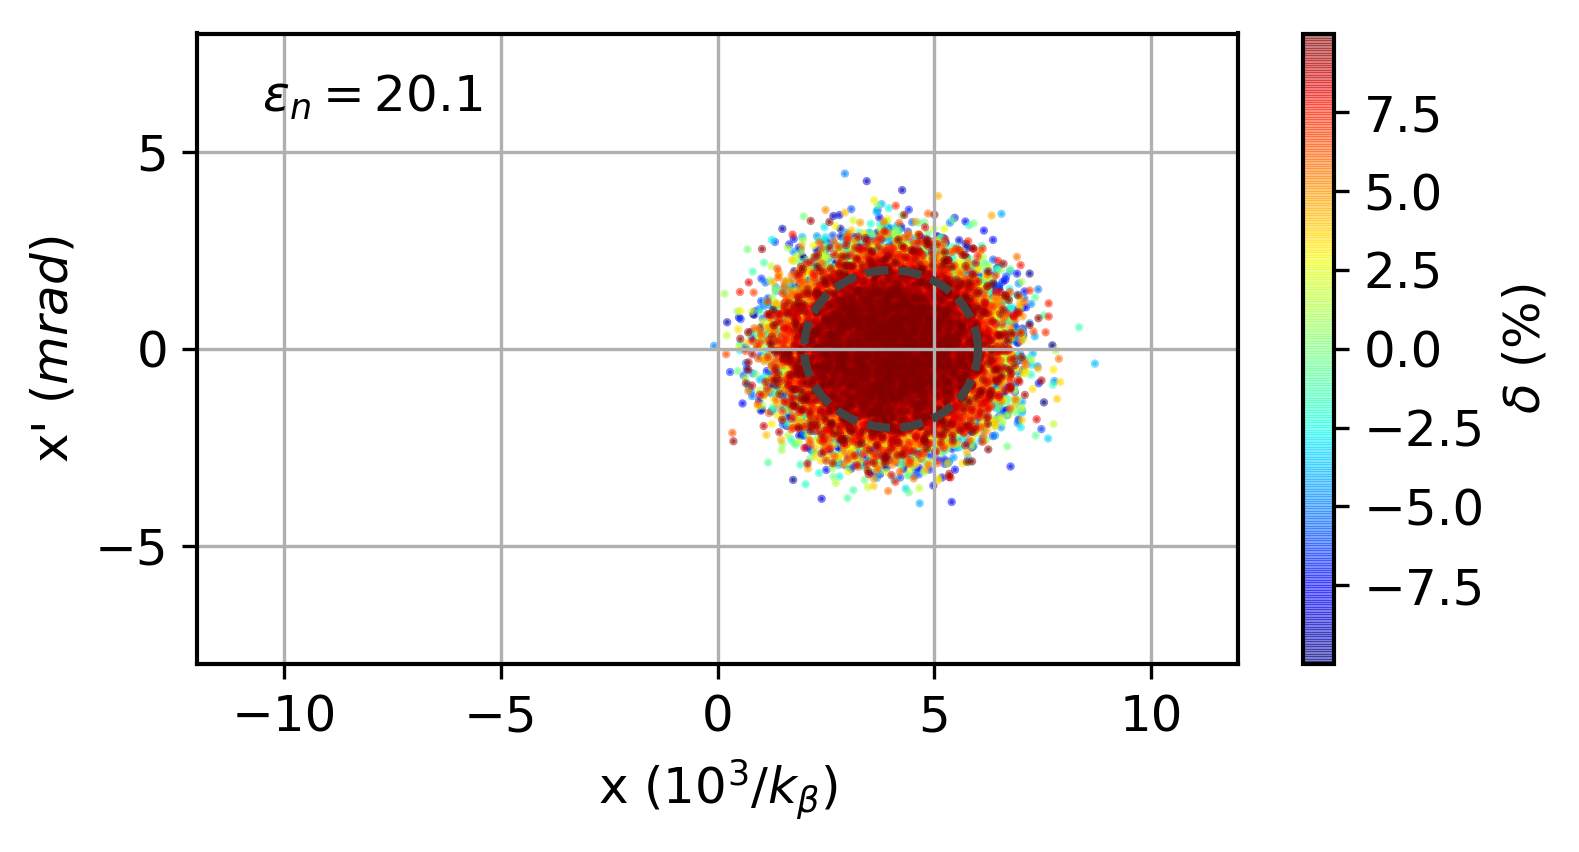

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed
Frame 420 completed
Frame 450 completed
Frame 480 completed
Frame 510 completed
Frame 540 completed
Frame 570 completed
Frame 600 completed


In [3]:
# This needs to be before animation is imported
plt.rcParams['animation.ffmpeg_path'] = '/home/robert/anaconda3/envs/CU-PWFA/bin/ffmpeg'
import matplotlib.animation as animation
grey = '#444444'

for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0
# Grab the dump we are interested in
def get_data(ind):
    ptcls, z = beam.load_ptcls(ind)
    ptx = ptcls[:, 0]*1e3
    ptxp = ptcls[:, 1]*1e3
    gamma = ptcls[:, 5]
    sort = np.argsort(gamma)
    ptx = ptx[sort]
    ptxp = ptxp[sort]
    gamma = gamma[sort]
    delta = (gamma/20000 - 1)*100
    return ptx, ptxp, delta

def calc_em(x, xp):
    offset_x = np.average(x)
    offset_xp = np.average(xp)
    dx = x - offset_x
    dxp = xp - offset_xp
    # Calculate the RMS sizes and the correlation
    sigmax2 = np.average(dx**2)
    sigmaxp2 = np.average(dxp**2)
    sigmaxxp = np.average(dx*dxp)
    ex = np.sqrt(sigmax2*sigmaxp2 - sigmaxxp**2)
    beta = sigmax2/ex
    alpha = -sigmaxxp/ex
    return beta, alpha, ex, offset_x, offset_xp
    
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t)+offset_x, 
              2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp, 'k--', c=grey)[0]
emText = plt.text(-10.5, 6, r'$\epsilon_n=$%0.1f' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($10^3/k_{\beta}$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-12, 12)
plt.ylim(-8, 8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;
def updatefig(*args):
    global i
    ptx, ptxp, gamma = get_data(i)
    beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)
    sct.set_offsets(np.stack((ptx, ptxp), axis=-1))
    sct.set_array(gamma)
    em.set_data(2*np.sqrt(beta*ex)*np.cos(t)+offset_x,
                2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp)
    emText.set_text(r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
    i += 1
    # If we run over, loop
    if i == Nz+1:
        i = ind
    if i % 30 == 0:
        print("Frame", i, "completed")
    return elements

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
ani.save(path+'PureOffset.mp4', fps=30)

In [4]:
# Calculate beam evolution with no offset through a uniform plasma
Nz = 600
z = np.linspace(0, 10*2*np.pi, Nz, dtype='double')
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2 # Go from Robert units to normalized units
ne = ne0*np.ones(Nz)
kb = 5.95074e4 * np.sqrt(ne0)/np.sqrt(2*gb0)
betaBeam = 1
alphaBeam = 0
eps = 1.0e-6
delta = 0.1
sigma_r0 = np.sqrt(betaBeam*eps)
electronParams = {
    'name' : 'Offset_and_Mismatch',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : gb0*eps,
    'betax' : 2*betaBeam,
    'betay' : 2*betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : delta,
    'offset_x' : 4*sigma_r0,
    'offset_y' : 0,
    'offset_xp' : 0,
    'offset_yp' : 0
}

beam = electronbeam.OffsetGaussianElectronBeam(electronParams)
#beam.plot_current_phase()

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return ne
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z*1e6, dumpPer, 4)

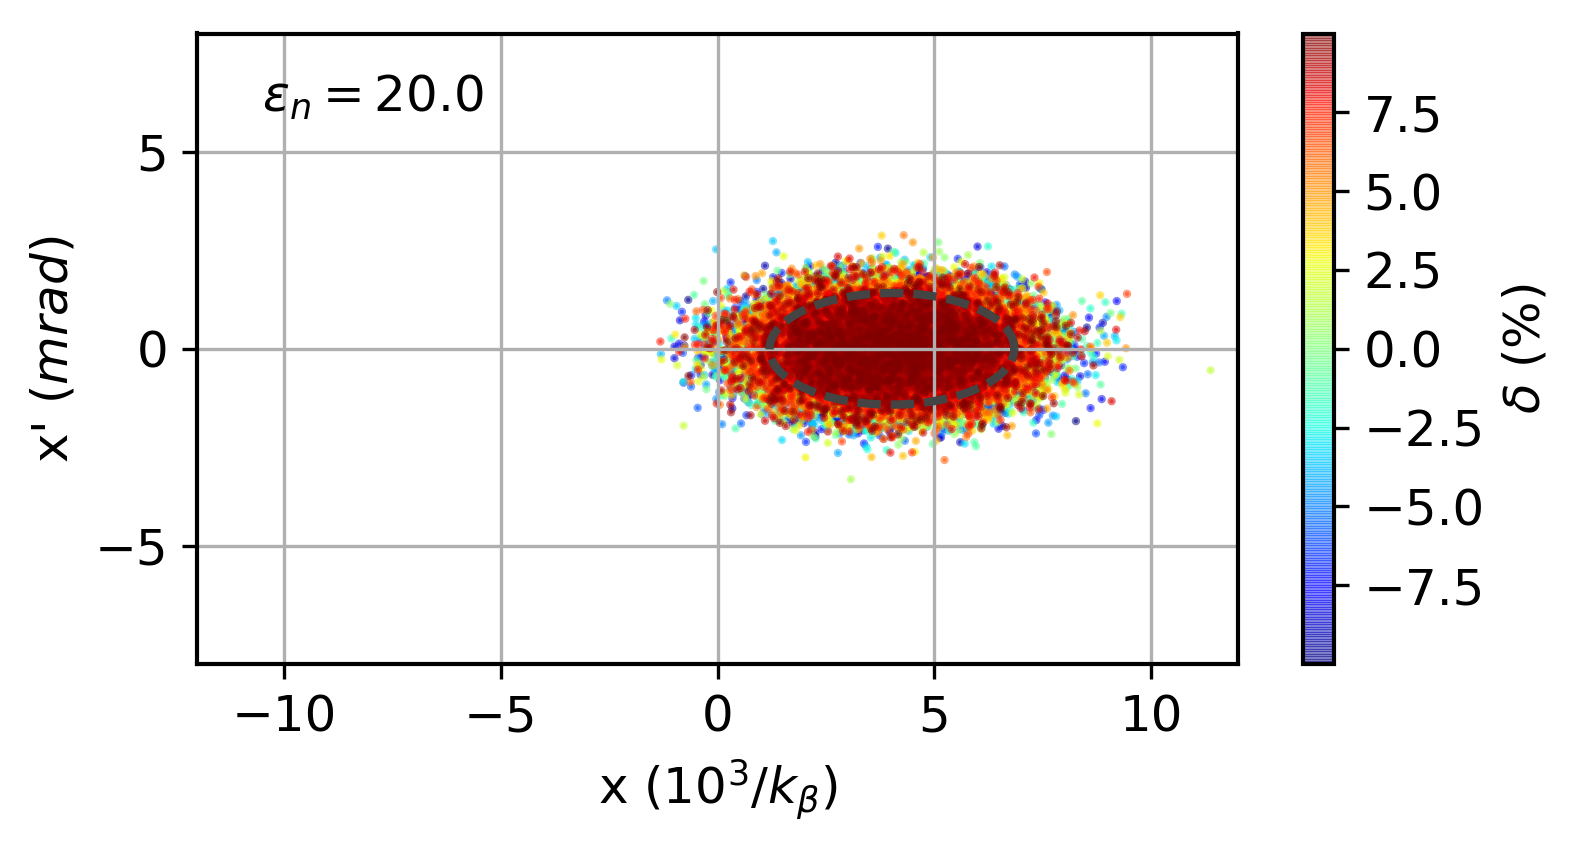

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed
Frame 420 completed
Frame 450 completed
Frame 480 completed
Frame 510 completed
Frame 540 completed
Frame 570 completed
Frame 600 completed


In [5]:
# This needs to be before animation is imported
plt.rcParams['animation.ffmpeg_path'] = '/home/robert/anaconda3/envs/CU-PWFA/bin/ffmpeg'
import matplotlib.animation as animation
grey = '#444444'

for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0
# Grab the dump we are interested in
def get_data(ind):
    ptcls, z = beam.load_ptcls(ind)
    ptx = ptcls[:, 0]*1e3
    ptxp = ptcls[:, 1]*1e3
    gamma = ptcls[:, 5]
    sort = np.argsort(gamma)
    ptx = ptx[sort]
    ptxp = ptxp[sort]
    gamma = gamma[sort]
    delta = (gamma/20000 - 1)*100
    return ptx, ptxp, delta

def calc_em(x, xp):
    offset_x = np.average(x)
    offset_xp = np.average(xp)
    dx = x - offset_x
    dxp = xp - offset_xp
    # Calculate the RMS sizes and the correlation
    sigmax2 = np.average(dx**2)
    sigmaxp2 = np.average(dxp**2)
    sigmaxxp = np.average(dx*dxp)
    ex = np.sqrt(sigmax2*sigmaxp2 - sigmaxxp**2)
    beta = sigmax2/ex
    alpha = -sigmaxxp/ex
    return beta, alpha, ex, offset_x, offset_xp
    
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t)+offset_x, 
              2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp, 'k--', c=grey)[0]
emText = plt.text(-10.5, 6, r'$\epsilon_n=$%0.1f' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($10^3/k_{\beta}$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-12, 12)
plt.ylim(-8, 8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;
def updatefig(*args):
    global i
    ptx, ptxp, gamma = get_data(i)
    beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)
    sct.set_offsets(np.stack((ptx, ptxp), axis=-1))
    sct.set_array(gamma)
    em.set_data(2*np.sqrt(beta*ex)*np.cos(t)+offset_x,
                2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp)
    emText.set_text(r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
    i += 1
    # If we run over, loop
    if i == Nz+1:
        i = ind
    if i % 30 == 0:
        print("Frame", i, "completed")
    return elements

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
ani.save(path+'OffsetAndMismatch.mp4', fps=30)

In [6]:
# Calculate beam evolution with no offset through a uniform plasma
Nz = 600
z = np.linspace(0, 10*2*np.pi, Nz, dtype='double')
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2 # Go from Robert units to normalized units
ne = ne0*np.ones(Nz)
kb = 5.95074e4 * np.sqrt(ne0)/np.sqrt(2*gb0)
betaBeam = 1
alphaBeam = 0
eps = 1.0e-6
delta = 0.1
sigma_r0 = np.sqrt(betaBeam*eps)
electronParams = {
    'name' : 'Similar_Mismatch',
    'path' : path,
    'load' : False,
    'N' : 50000,
    'gamma' : 20000,
    'emittance' : gb0*eps,
    'betax' : 2*betaBeam,
    'betay' : 2*betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : delta,
    'offset_x' : sigma_r0,
    'offset_y' : 0,
    'offset_xp' : 0,
    'offset_yp' : 0
}

beam = electronbeam.OffsetGaussianElectronBeam(electronParams)
#beam.plot_current_phase()

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return ne
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 1
interactions.electron_plasma(beam, plasmaDen, z*1e6, dumpPer, 4)

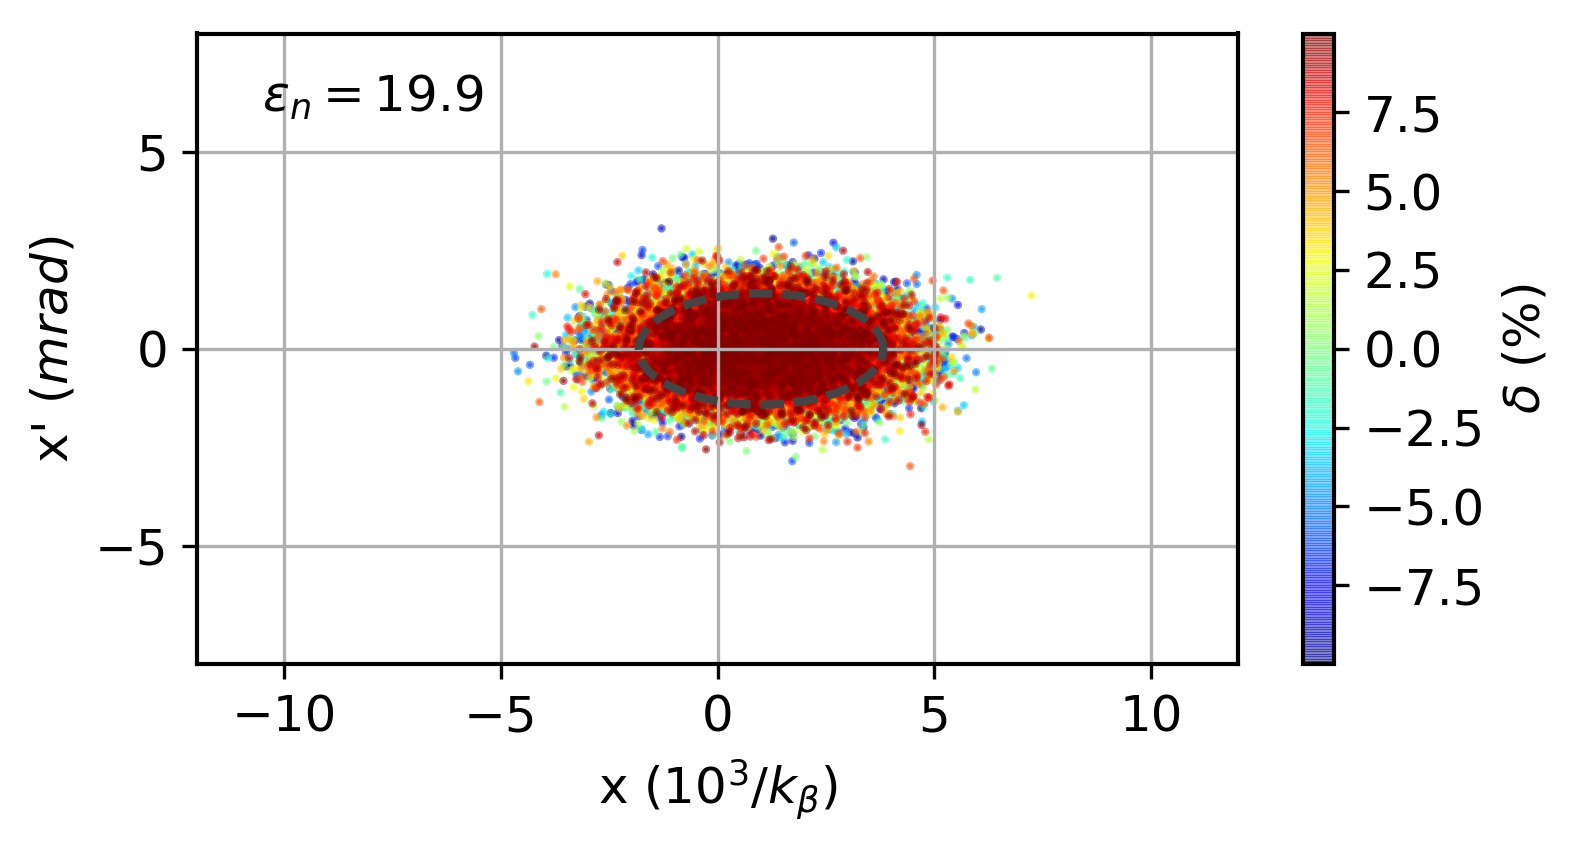

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed
Frame 420 completed
Frame 450 completed
Frame 480 completed
Frame 510 completed
Frame 540 completed
Frame 570 completed
Frame 600 completed


In [7]:
# This needs to be before animation is imported
plt.rcParams['animation.ffmpeg_path'] = '/home/robert/anaconda3/envs/CU-PWFA/bin/ffmpeg'
import matplotlib.animation as animation
grey = '#444444'

for i in range(0, Nz):
    ptcls = beam.load_ptcls(i)[0]

ind = 0
# Grab the dump we are interested in
def get_data(ind):
    ptcls, z = beam.load_ptcls(ind)
    ptx = ptcls[:, 0]*1e3
    ptxp = ptcls[:, 1]*1e3
    gamma = ptcls[:, 5]
    sort = np.argsort(gamma)
    ptx = ptx[sort]
    ptxp = ptxp[sort]
    gamma = gamma[sort]
    delta = (gamma/20000 - 1)*100
    return ptx, ptxp, delta

def calc_em(x, xp):
    offset_x = np.average(x)
    offset_xp = np.average(xp)
    dx = x - offset_x
    dxp = xp - offset_xp
    # Calculate the RMS sizes and the correlation
    sigmax2 = np.average(dx**2)
    sigmaxp2 = np.average(dxp**2)
    sigmaxxp = np.average(dx*dxp)
    ex = np.sqrt(sigmax2*sigmaxp2 - sigmaxxp**2)
    beta = sigmax2/ex
    alpha = -sigmaxxp/ex
    return beta, alpha, ex, offset_x, offset_xp
    
# Get the first piece of data
ptx, ptxp, gamma = get_data(ind)
beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)

# Create the emittance ellipse plot
t = np.linspace(0, 2*np.pi, 300)

# Create the plot
fig = plt.figure(figsize=(5.45, 3), dpi=300)
sct = plt.scatter(ptx, ptxp, c=gamma, cmap=plt.cm.get_cmap('jet'), 
                      s=1.0, alpha=0.5)
em = plt.plot(2*np.sqrt(beta*ex)*np.cos(t)+offset_x, 
              2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp, 'k--', c=grey)[0]
emText = plt.text(-10.5, 6, r'$\epsilon_n=$%0.1f' % (ex*20))
elements = [sct, em, emText]

# Formatting stuff
cb = plt.colorbar()
cb.set_label(r'$\delta$ (%)')
plt.xlabel(r'x ($10^3/k_{\beta}$)')
plt.ylabel(r"x' ($mrad$)")
plt.xlim(-12, 12)
plt.ylim(-8, 8)
plt.grid(True)
plt.tight_layout()
plt.show()

# Update the scatter plot data
i = ind+1;
def updatefig(*args):
    global i
    ptx, ptxp, gamma = get_data(i)
    beta, alpha, ex, offset_x, offset_xp = calc_em(ptx, ptxp)
    sct.set_offsets(np.stack((ptx, ptxp), axis=-1))
    sct.set_array(gamma)
    em.set_data(2*np.sqrt(beta*ex)*np.cos(t)+offset_x,
                2*np.sqrt(ex/beta)*(-alpha*np.cos(t)+np.sin(t))+offset_xp)
    emText.set_text(r'$\epsilon_n=$%0.2f $\mu m\,rad$' % (ex*20))
    i += 1
    # If we run over, loop
    if i == Nz+1:
        i = ind
    if i % 30 == 0:
        print("Frame", i, "completed")
    return elements

ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=Nz-ind-3)
ani.save(path+'SimilarMismatch.mp4', fps=30)